In [13]:
import os
#!wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM432nnn/GSM432687/suppl/GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.wig.gz

In [15]:
myoption=r'"/cellar/users/btsui/.aspera/connect/bin/ascp|/cellar/users/btsui/.aspera/connect/etc/asperaweb_id_dsa.openssh"'
my_id='SRR019649'
downloadCommand=['prefetch','-t','ascp','--ascp-path',myoption,my_id]


In [ ]:
os.system(' '.join(downloadCommand))

In [5]:
#!wc -l GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.wig

53129972 GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.wig


In [14]:
### those are probably CpG
#
### try checking which ones does it align to?
### map half of the reads first, does it yield anything that resemble beta-value with just half of the reads
SRA_FASTQ_TOOL_DIR="/cellar/users/btsui/Program/SRA_TOOL_KIT/sratoolkit.2.4.2-ubuntu64/bin/fastq-dump.2.4.2"
job_tmp_dir='/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/'
dump_command=[SRA_FASTQ_TOOL_DIR,"-B","--split-files",'/tmp/btsui/METH/sra/'+my_id+'.sra', '-M', '0',"-O",job_tmp_dir]
os.mkdir(job_tmp_dir+my_id)


NameError: name 'my_id' is not defined

In [ ]:
os.system(' '.join(dump_command))

In [ ]:
###$ bedtools getfasta [OPTIONS] -fi <input FASTA> -bed <BED/GFF/VCF>

In [16]:
### bam feature count?
## do the mapping: 
myRef='/cellar/users/btsui/Data/RAPMAP_INDEX/HMB/Homo_sapiens/'
myCmd='/cellar/users/btsui/Program/rapmap/RapMap-master/bin/rapmap quasimap -i {ref} -r {r1} --noStrictCheck -o mapped_reads.sam'.format(ref=myRef,r1=job_tmp_dir+my_id+'_1.fastq'
                                                 ,r2=job_tmp_dir+my_id+'_2.fastq')

In [17]:
job_tmp_dir+my_id+'.fastq'

'/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/SRR019649.fastq'

In [ ]:
!ls 

In [18]:
myCmd

'/cellar/users/btsui/Program/rapmap/RapMap-master/bin/rapmap quasimap -i /cellar/users/btsui/Data/RAPMAP_INDEX/HMB/Homo_sapiens/ -r /cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/SRR019649_1.fastq --noStrictCheck -o mapped_reads.sam'

In [ ]:
!/cellar/users/btsui/Program/rapmap/RapMap-master/bin/rapmap quasimap -i /cellar/users/btsui/Data/RAPMAP_INDEX/HMB/Homo_sapiens/ -r /cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/SRR019649_1.fastq --noStrictCheck -o mapped_reads.sam

[2017-11-16 07:14:09.212] [stderrLog] [info] 
command line options
index: 
unmated read(s): /cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/SRR019649_1.fastq
output: mapped_reads.sam
num. threads: 1
max num. hits: 200
quasi-coverage: 0
no output: false
sensitive: false
strict check: false
fuzzy intersection: false
consistent hits: false
[2017-11-16 07:14:09.216] [stderrLog] [info] Loading Suffix Array 
[2017-11-16 07:14:09.382] [stderrLog] [info] Loading Transcript Info 
[2017-11-16 07:14:09.442] [stderrLog] [info] Loading Rank-Select Bit Array
[2017-11-16 07:14:09.467] [stderrLog] [info] There were 295776 set bits in the bit array
[2017-11-16 07:14:09.470] [stderrLog] [info] Computing transcript lengths
[2017-11-16 07:14:09.470] [stderrLog] [info] Waiting to finish loading hash
[2017-11-16 07:14:11.582] [stderrLog] [info] Done loading index




[2017-11-16 07:14:11.759] [stderrLog] [info] mapping reads . . . 



saw 1000001 reads
# hits per read = 0.209907
sa

In [30]:
os.system(myCmd)

0

In [31]:
!ls -lah mapped_reads.sam

-rw-r--r-- 1 btsui users 15M Nov 16 05:07 mapped_reads.sam


In [32]:
!tail mapped_reads.sam

@SQ	SN:chr9:140917830-140918052_methylated	LN:222
@SQ	SN:chr9:140917855-140918065_unmethylated	LN:210
@SQ	SN:chr9:140917855-140918065_methylated	LN:210
@SQ	SN:chr9:140917878-140918094_unmethylated	LN:216
@SQ	SN:chr9:140917878-140918094_methylated	LN:216
@SQ	SN:chr9:140917922-140918138_unmethylated	LN:216
@SQ	SN:chr9:140917922-140918138_methylated	LN:216
@SQ	SN:chr9:140917950-140918157_unmethylated	LN:207
@SQ	SN:chr9:140917950-140918157_methylated	LN:207
@PG	ID:rapmap	PN:rapmap	VN:0.5.0


In [26]:
!ls -lah /cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/SRR019649_1.fastq

-rw-r--r-- 1 btsui users 5.6G Nov 16 04:59 /cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/SRR019649_1.fastq


### use pandas to read in the data

In [32]:
import pandas as pd
import numpy as np
%matplotlib inline

In [35]:
!head /cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/SRR019649_1.fastq

@SRR019649.1 EVANS_3018:1:1:0:1677 length=87
NTATTATTTTATTATAGGTGTNAGGAAATGAGTANANNNNNNNNNTTAGANNNNTTNNNNNNNNNNGATTTATGGATNNNNNNNNAT
+SRR019649.1 EVANS_3018:1:1:0:1677 length=87
!1/6747<#############!############!#!!!!!!!!!#####!!!!##!!!!!!!!!!###########!!!!!!!!##
@SRR019649.2 EVANS_3018:1:1:0:1667 length=87
NATAGTATTTTATGAGTAGGGNTGGGGGATTTGTNTNNNNNNNNNGGTTANNNNTTNNNNNNNNNNTTGTTATTGTANNNNNNNNGA
+SRR019649.2 EVANS_3018:1:1:0:1667 length=87
!####################!############!#!!!!!!!!!#####!!!!##!!!!!!!!!!###########!!!!!!!!##
@SRR019649.3 EVANS_3018:1:1:0:863 length=87
NTTGAGAAAGTTAATTAGATTNGGTAAAGTAATANTNNNNNNNNNTGTATNNNNGGNNNNNNNNNNAGCGGAAGAACNNNNNNNNCG


In [22]:
tmpInDf=pd.read_csv('mapped_reads.sam',comment='@',sep='\t',header=None)

In [27]:
tmpInDf.columns=['query','','site','mate','','cigar','','','','query_seq','','']

In [36]:
tmpInDf.head()

,query,,site,mate,,cigar,,,,query_seq,,
0,SRR019649.327,0,chr14:104069436-104069692_unmethylated,195,255,62M25S,*,0,0,CGTGATATTGTATTTTAGTTTGGGTGATAGAGTGAGNNNNNNNNNT...,*,NH:i:2
1,SRR019649.327,2304,chr3:10222958-10223314_unmethylated,279,255,78M9S,*,0,0,CGTGATATTGTATTTTAGTTTGGGTGATAGAGTGAGNNNNNNNNNT...,*,NH:i:2
2,SRR019649.329,0,chr11:31380762-31380996_unmethylated,10,255,87M,*,0,0,ATATATATATTATGGAATATTATGTAGTTATAAAAANNNNNNNNNT...,*,NH:i:11
3,SRR019649.329,2304,chr11:31380762-31380996_methylated,10,255,87M,*,0,0,ATATATATATTATGGAATATTATGTAGTTATAAAAANNNNNNNNNT...,*,NH:i:11
4,SRR019649.329,2304,chr13:58459223-58459566_unmethylated,179,255,87M,*,0,0,ATATATATATTATGGAATATTATGTAGTTATAAAAANNNNNNNNNT...,*,NH:i:11


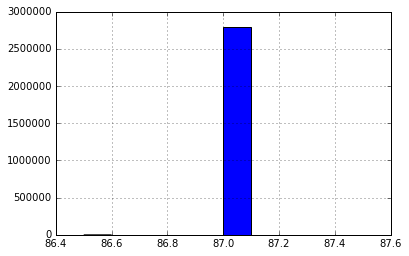

In [33]:
tmpInDf.query_seq.str.len().hist()

In [98]:
#figure out the beta value for sites 
tmpInDf['n_matches']=tmpInDf.cigar.str.extract('(\d+)M').astype(np.int)

/cellar/users/btsui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [99]:
sortedDf=tmpInDf.sort_values(['query','n_matches'],ascending=True)

In [100]:
VC=sortedDf['query'].value_counts()#.drop_duplicates(['query','n_matches'])

In [101]:
selectedReads=VC.index[VC==1]

In [102]:
uniqueHitDf=sortedDf[sortedDf['query'].isin(selectedReads)]

In [104]:
siteS=uniqueHitDf.site.value_counts()

In [106]:
multI=siteS.index.str.split('_',expand=True)

In [108]:
siteS.index=multI

In [111]:
myUnstackDf=siteS.unstack()

In [113]:
myUnstackDf['total']=myUnstackDf.sum(axis=1)

In [116]:
myUnstackDf.sort_values('total').to_pickle('rapmap.pickle')

### for the wig file, convert to bed file?

In [117]:
!head GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.wig

track type=wiggle_0 name="IMR90 combined" visibility=full color=20,150,20 altColor=150,20,20 windowingFunction=mean
variableStep chrom=chr1
10469	0.692307692307692
10470	0.692307692307692
10471	0.671875
10472	0.671875
10484	0.782051282051282
10485	0.782051282051282
10489	0.810126582278481
10490	0.810126582278481


In [118]:
!awk '{print $1"\t"$2-1"\t"$2"\t"$3}' GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.wig > GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.bedgraph


In [120]:
!head GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.wig

track type=wiggle_0 name="IMR90 combined" visibility=full color=20,150,20 altColor=150,20,20 windowingFunction=mean
variableStep chrom=chr1
10469	0.692307692307692
10470	0.692307692307692
10471	0.671875
10472	0.671875
10484	0.782051282051282
10485	0.782051282051282
10489	0.810126582278481
10490	0.810126582278481


In [2]:
%%bash
source /cellar/users/btsui/.bash_profile
wig2bed < GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.wig > GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.bed

In [9]:
!ls -alth 

total 1.3G
drwxr-xr-x 3 btsui users   15 Nov 16 06:23 .
-rw-r--r-- 1 btsui users  19K Nov 16 06:23 TestRunOneFile.ipynb
-rw-r--r-- 1 btsui users    0 Nov 16 06:21 GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.bed
-rw-r--r-- 1 btsui users  32K Nov 16 06:08 Untitled.ipynb
-rw-r--r-- 1 btsui users 1.7G Nov 16 05:45 GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.bedgraph
drwxr-xr-x 2 btsui users    5 Nov 16 05:44 .ipynb_checkpoints
-rw-r--r-- 1 btsui users 2.2M Nov 16 05:40 rapmap.pickle
-rw-r--r-- 1 btsui users  21K Nov 16 05:19 GenerateReference.ipynb
-rw-r--r-- 1 btsui users 472M Nov 16 05:18 mapped_reads.sam
-rw-r--r-- 1 btsui users 4.1M Nov 16 05:01 mapped_reads.bam
-rw-r--r-- 1 btsui users  46M Nov 16 04:08 MHB.tsv
-rw-r--r-- 1 btsui users 4.3M Nov 16 01:50 MHB.bed
-rw-r--r-- 1 btsui users 4.0M Nov 16 01:29 ng.3805-S2.xlsx
-rw-r--r-- 1 btsui users 1.2G Nov 16 01:23 GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.wig
drwxr-xr-x 5 btsui users    6 Nov 16 01:22 ..


In [123]:
with open ('GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.wig','r')as f:
    myL=f.read()

In [154]:
chromL=myL.split('variableStep')

In [155]:
len(chromL)

26

In [ ]:
betaSL=[]
for tmpL in chromL[1:]:
    splitL=tmpL.split('\n')
    siteL=splitL[1:]
    BetaL=[]
    SiteL=[]
    for L in siteL:
        if '\t' in L:
            Site,Beta= L.split('\t') 
            SiteL.append(Site)
            BetaL.append(Beta)

    multI=pd.MultiIndex.from_product([[splitL[0].split('chrom=')[1]],SiteL])
    tmpS=pd.Series(index=multI,data=BetaL)
    betaSL.append(tmpS)

In [ ]:
GSM432687_UCSD=pd.concat(betaSL)

In [ ]:
GSM432687_UCSD.to_pickle('GSM432687_UCSD.pickle')

In [10]:
!/cellar/users/btsui/Program/rapmap/RapMap-master/bin/rapmap quasimap --help


USAGE: 

   /cellar/users/btsui/Program/rapmap/RapMap-master/bin/rapmap  [-q] [-c]
                                        [-f] [--noStrictCheck] [-e] [-z
                                        <double in [0,1]>] [-m <positive
                                        integer>] [-t <positive integer>]
                                        [-o <path>] [-r <path>] [-2 <path>]
                                        [-1 <path>] [-n] -i <path> [--]
                                        [--version] [-h]


Where: 

   -q,  --quiet
     Disable all console output apart from warnings and errors

   -c,  --consistentHits
     Ensure that the hits collected are consistent (co-linear)

   -f,  --fuzzyIntersection
     Find paired-end mapping locations using fuzzy intersection

   --noStrictCheck
     Don't perform extra checks to try and assure that only equally "best"
     mappings for a read are reported

   -e,  --sensitive
     Perform a more sensitive quasi-mapping by disabling NIP skipp